## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import re

In [3]:
# Load our data
spam = pd.read_csv("HireBeat_fake_post.csv")
spam = spam[['Job title','Job description','Job location','Job level',
                       'Company type','Company overview','Skills','Education']]
spam.fillna(" ",inplace = True)

In [4]:
import pandas as pd
from bs4 import BeautifulSoup

# Function to convert HTML to plain text
def html_to_text(html):
    soup = BeautifulSoup(html, 'html.parser')
    return soup.get_text()

# Apply the function to each cell in the dataframe
spam['Job description'] = spam['Job description'].apply(html_to_text)
spam['Company overview'] = spam['Company overview'].apply(html_to_text)

spam['fraudulent'] = 1

In [5]:
spam.head()

,Job title,Job description,Job location,Job level,Company type,Company overview,Skills,Education,fraudulent
0,IT Help Desk Technician,Are you passionate about technology and thrive...,"Atlanta, GA, US| Hybrid",Senior,"Health, Wellness and Fitness","We encourage the development of knowledge, int...","[""{'value': 'ability to work in a team structu...",Not Provided,1
1,Data Specialist/Typist,We are the largest healthcare marketing and co...,"Houston, TX, US| Hybrid",Senior,"Health, Wellness and Fitness","We encourage the development of knowledge, int...","[""{'value': '1099 preparation', 'label': '1099...",Not Provided,1
2,Interpreter/Translator,We are hiring immediately for Bilingual (Japa...,"Windermere, FL, US| Remote",Entry Level,Religious Institutions,Empowering Action was founded in 2012 by Kent ...,"[""{'value': 'chinese translation', 'label': 'c...",Not Provided,1
3,Marketing Coordinator,"At Concrete Masters Inc., much of our success ...","Apple Valley, CA, US| Remote",Entry Level,Construction,Here at Concrete Masters we offer a Variety of...,,Not Provided,1
4,Digital Marketing Manager,We are looking for an experienced and result-d...,"Apple Valley, CA, US| Remote",Entry Level,Construction,Here at Concrete Masters we offer a Variety of...,,Not Provided,1


In [6]:
def array_to_text(data): #Translate json format array into text
    try:
        data = ast.literal_eval(data)
        values = [item.split(":")[1].strip().replace("\'", "").replace('label', '').rstrip(', ') for item in data]
        values = ",".join(values)
        if values == "": return " "
        else: return values
    except: 
        if data == "": return " "
        else: return data

In [7]:
cleaned_df = spam
cleaned_df["Skills"] = cleaned_df["Skills"].apply(array_to_text)

In [8]:
cleaned_df

,Job title,Job description,Job location,Job level,Company type,Company overview,Skills,Education,fraudulent
0,IT Help Desk Technician,Are you passionate about technology and thrive...,"Atlanta, GA, US| Hybrid",Senior,"Health, Wellness and Fitness","We encourage the development of knowledge, int...","ability to work in a team structure,ability to...",Not Provided,1
1,Data Specialist/Typist,We are the largest healthcare marketing and co...,"Houston, TX, US| Hybrid",Senior,"Health, Wellness and Fitness","We encourage the development of knowledge, int...","1099 preparation,ability to analyze quantitati...",Not Provided,1
2,Interpreter/Translator,We are hiring immediately for Bilingual (Japa...,"Windermere, FL, US| Remote",Entry Level,Religious Institutions,Empowering Action was founded in 2012 by Kent ...,"chinese translation,spanish translation,englis...",Not Provided,1
3,Marketing Coordinator,"At Concrete Masters Inc., much of our success ...","Apple Valley, CA, US| Remote",Entry Level,Construction,Here at Concrete Masters we offer a Variety of...,,Not Provided,1
4,Digital Marketing Manager,We are looking for an experienced and result-d...,"Apple Valley, CA, US| Remote",Entry Level,Construction,Here at Concrete Masters we offer a Variety of...,,Not Provided,1
...,...,...,...,...,...,...,...,...,...
3841,Product Tester Work From Home,You must apply on our website only\nApply here...,"Dallas, TX, US",Entry Level,Internet,Welcome,,Not Provided,1
3842,Online Jobs For Teens,You must apply on our website only\nApply here...,"Dallas, TX, US",Entry Level,Internet,Welcome,,Not Provided,1
3843,Data Entry Work From Home (Remote Data Entry Job),You must apply on our website only\nApply here...,"Dallas, TX, US",Entry Level,Internet,Welcome,,Not Provided,1
3844,Data Entry Clerk,You must apply on our website only\nApply here...,"Dallas, TX, US",Entry Level,Internet,Welcome,,Not Provided,1


## Try data augmentation

In [11]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
import random
from tqdm import tqdm

In [12]:
# Load the original CSV data
original_data = cleaned_df
# Synonym Replacement
def synonym_replacement(text, n=1):
    words = nltk.word_tokenize(text)
    new_words = words.copy()
    for _ in range(n):
        for i in range(len(words)):
            synsets = wordnet.synsets(words[i])
            if synsets:
                syn = random.choice(synsets)
                new_word = syn.lemmas()[0].name()
                new_words[i] = new_word.replace("_", " ").lower()
    return " ".join(new_words)


In [13]:
# Augment the data and append to DataFrame
desired_samples = 20000
augmented_data = pd.DataFrame(columns=original_data.columns)
columns_to_augment = ['Job description', 'Company overview']
while len(augmented_data) < desired_samples:
    for _, row in tqdm(original_data.iterrows()):
        augmented_row = row.copy()
        for column_name in original_data.columns:
            if column_name in columns_to_augment:
                try: 
                    augmented_row[column_name] = synonym_replacement(row[column_name])
                    augmented_data = augmented_data.append(augmented_row)
                except:
                    print(row, row[column_name])
        if len(augmented_data) >= desired_samples:
            break

3846it [01:13, 52.28it/s]
3846it [01:28, 43.46it/s]
2307it [00:59, 38.68it/s]


In [14]:
augmented_data.head()

,Job title,Job description,Job location,Job level,Company type,Company overview,Skills,Education,fraudulent
0,IT Help Desk Technician,be you passionate about engineering and boom i...,"Atlanta, GA, US| Hybrid",Senior,"Health, Wellness and Fitness","We encourage the development of knowledge, int...","ability to work in a team structure,ability to...",Not Provided,1
0,IT Help Desk Technician,be you passionate about engineering and boom i...,"Atlanta, GA, US| Hybrid",Senior,"Health, Wellness and Fitness","We encourage the development of cognition , in...","ability to work in a team structure,ability to...",Not Provided,1
1,Data Specialist/Typist,We exist the big healthcare marketing and comm...,"Houston, TX, US| Hybrid",Senior,"Health, Wellness and Fitness","We encourage the development of knowledge, int...","1099 preparation,ability to analyze quantitati...",Not Provided,1
1,Data Specialist/Typist,We exist the big healthcare marketing and comm...,"Houston, TX, US| Hybrid",Senior,"Health, Wellness and Fitness","We encourage the development of cognition , in...","1099 preparation,ability to analyze quantitati...",Not Provided,1
2,Interpreter/Translator,We be lease immediately for bilingual ( japane...,"Windermere, FL, US| Remote",Entry Level,Religious Institutions,Empowering Action was founded in 2012 by Kent ...,"chinese translation,spanish translation,englis...",Not Provided,1


***Finished generating 20,000 spam data from our data***

#### Augmentation for kaggle data

In [16]:
# Generate more data
df = pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [17]:
del df['salary_range']
del df['job_id']
del df['department']
del df['benefits']
del df['telecommuting']
del df['has_company_logo']
del df['has_questions']
del df['employment_type']
del df['function']

In [18]:
df_rename = df.rename(columns = {'required_education':'Education','title':'Job title',
                     'required_experience':'Job level','industry':'Company type',
                     'company_profile':'Company overview','requirements':'Skills',
                     'location':'Job location', 'description':'Job description','title':'Job title'
                    })
df_rename.fillna(" ",inplace = True)

In [19]:
df_rename.head()

,Job title,Job location,Company overview,Job description,Skills,Job level,Education,Company type,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Internship,,,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,Not Applicable,,Marketing and Advertising,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Mid-Senior level,Bachelor's Degree,Computer Software,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,0


In [20]:
# Augment the data and append to DataFrame
desired_samples = 25000
augmented_non_spam = pd.DataFrame(columns=df_rename.columns)
columns_to_augment = ['Job description', 'Company overview']
while len(augmented_non_spam) < desired_samples:
    for _, row in tqdm(df_rename.iterrows()):
        augmented_row = row.copy()
        for column_name in df_rename.columns:
            if column_name in columns_to_augment:
                try: 
                    augmented_row[column_name] = synonym_replacement(row[column_name])
                    augmented_non_spam = augmented_non_spam.append(augmented_row)
                except:
                    print(row, row[column_name])
        if len(augmented_non_spam) >= desired_samples:
            break

12499it [04:40, 44.63it/s]


In [21]:
augmented_non_spam

,Job title,Job location,Company overview,Job description,Skills,Job level,Education,Company type,fraudulent
0,Marketing Intern,"US, NY, New York","We 're Food52 , and we 've create deoxyadenosi...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Internship,,,0
0,Marketing Intern,"US, NY, New York","We 're Food52 , and we 've create deoxyadenosi...","Food52 , deoxyadenosine monophosphate aggressi...",Experience with content management systems a m...,Internship,,,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","ninety second , the world cloud video recordin...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,Not Applicable,,Marketing and Advertising,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","ninety second , the world cloud video recordin...",organize - concenter - vibrant - amazing ! pra...,What we expect from you:Your key responsibilit...,Not Applicable,,Marketing and Advertising,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",heroism overhaul leave work force solution tha...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,0
...,...,...,...,...,...,...,...,...,...
12497,Merchandiser - Commodity Trader,"US, NE, Omaha",Hawkeye recruitment put up monetary value effe...,silver process iraqi national congress be atte...,The successful candidate will have 3 to 5 year...,Entry level,High School or equivalent,Farming,0
12498,Police Officer,"US, WI, Milwaukee",Hawkeye recruitment provide cost effective rec...,The Eldridge Police Department is currently ac...,I.L.E.A. Certification preferred but not requi...,Entry level,High School or equivalent,Law Enforcement,0
12498,Police Officer,"US, WI, Milwaukee",Hawkeye recruitment provide cost effective rec...,The Eldridge police department exist presently...,I.L.E.A. Certification preferred but not requi...,Entry level,High School or equivalent,Law Enforcement,0
12499,Financial Analyst,"US, CA, San Francisco",intercommunication system ( # URL_cb674f93cbcd...,About the jobIntercom is looking for an analys...,REQUIREMENTSA proven track record of initiatin...,Associate,Bachelor's Degree,Internet,0


In [22]:
combined_df = pd.concat([augmented_non_spam, augmented_data])

In [23]:
combined_df

,Job title,Job location,Company overview,Job description,Skills,Job level,Education,Company type,fraudulent
0,Marketing Intern,"US, NY, New York","We 're Food52 , and we 've create deoxyadenosi...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Internship,,,0
0,Marketing Intern,"US, NY, New York","We 're Food52 , and we 've create deoxyadenosi...","Food52 , deoxyadenosine monophosphate aggressi...",Experience with content management systems a m...,Internship,,,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","ninety second , the world cloud video recordin...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,Not Applicable,,Marketing and Advertising,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","ninety second , the world cloud video recordin...",organize - concenter - vibrant - amazing ! pra...,What we expect from you:Your key responsibilit...,Not Applicable,,Marketing and Advertising,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",heroism overhaul leave work force solution tha...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,0
...,...,...,...,...,...,...,...,...,...
2305,data entry clerk,"Florida City, FL, US| Remote",The industry leadership in helicopter rise ser...,a data entrance clerk be creditworthy for tran...,,Mid Level,Not Provided,Airlines/Aviation,1
2306,personal assistant,"Fort Worth, TX, US| Remote",The Lufthansa Group is an aviation group with...,a personal assistant be indium accusation of r...,,Mid Level,Not Provided,Airlines/Aviation,1
2306,personal assistant,"Fort Worth, TX, US| Remote",The Lufthansa group be associate in nursing av...,a personal assistant be indium accusation of r...,,Mid Level,Not Provided,Airlines/Aviation,1
2307,personal assistant,"Michigan City, LaPorte County, IN| Remote",The Lufthansa Group is an aviation group with...,adenine personal assistant be indium charge of...,,Mid Level,Not Provided,Airlines/Aviation,1


In [21]:
#common_columns = augmented_non_spam.columns.intersection(augmented_data.columns)
#data = pd.concat([augmented_non_spam[common_columns], augmented_data[common_columns]]) # Combine the two dataframes
#full_data = data.sample(frac=1).reset_index(drop=True) # Randomized the order and reindex

In [24]:
def convert_to_plain_string(skill):
    if isinstance(skill, list):
        return ' '.join(skill)
    return skill

# Apply the function to the "Skills" column
combined_df['Skills'] = combined_df['Skills'].apply(convert_to_plain_string)

In [25]:
sampled_data = combined_df.sample(n=20000, random_state=42)
sampled_data

,Job title,Job location,Company overview,Job description,Skills,Job level,Education,Company type,fraudulent
2643,Data Clerk Entry,"Montana City, MT, US| Remote",The Lufthansa group constitute associate in nu...,by record newly and update information and cre...,,Mid Level,Not Provided,Airlines/Aviation,1
4955,Fraud Engineer / Data-mining Expert,"FI, ES, Helsinki",# URL_31fdc354999cbb96507ebbe4e9c4aa7eed5edd0d...,Our site ’ south effect be vitamin a reputatio...,Programming skills - our technology stack is P...,Entry level,,Financial Services,0
1501,Marketing management,"California City, CA, US| Remote","The Hertz Corporation, a subsidiary of Hertz G...",person world health organization sympathize th...,,Entry Level,Not Provided,Real Estate,1
6911,Product Support Specialist,"US, OR, Porland",EROAD embody establish to modernize newly zeal...,"EROAD is a fully integrated technology, road c...","To excel in this role, candidates require:Frie...",Entry level,Unspecified,Information Technology and Services,0
2213,Delivery driver,"Florida, Orange County, NY","The company looks for people who can grow, thi...",primary duty : a delivery driver ’ randomness ...,,Mid Level,Not Provided,Architecture & Planning,1
...,...,...,...,...,...,...,...,...,...
4470,English Teacher Abroad,"US, MI, Ann Arbor",We assistant teacher get safe & adenosine mono...,"playing period with pull the leg of , draw giv...",University degree required. TEFL / TESOL / CEL...,,Bachelor's Degree,Education Management,0
11840,West Yorkshire Lead Generators/Sales Opporutunity,"GB, WKF, Wakefield",establish on the principle that broad time edu...,We ask two Telesales administrator for our bus...,Sales experience.,Associate,Vocational,,0
8404,Sales Coordinator,"ZA, WC, Cape Town",,"a fast-paced , B2B marketing fast be count for...",Evidence of success in a target-driven positio...,Not Applicable,,Marketing and Advertising,0
1375,Data entry Clerk,"Illinois City, IL, US| Remote",Whether you ’ re angstrom professional oregon ...,We equal front for angstrom focused datum entr...,,Entry Level,Not Provided,Automotive,1


In [26]:
sampled_data['Skills'] = sampled_data['Skills'].astype(str)

In [27]:
sampled_data['text'] = (sampled_data['Job description'] + ' ' + sampled_data['Company overview'] + ' ' +
                        sampled_data['Skills'] + ' ' + sampled_data['Job title'] + ' ' +
                        sampled_data['Job location'] + ' ' + sampled_data['Company type'] + ' ' +
                        sampled_data['Job level'] + ' ' + sampled_data['Education'])

In [28]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag

In [29]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Sylvia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Sylvia/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Sylvia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/Sylvia/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [31]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

#### Lemmatization

In [33]:
sampled_data.reset_index(drop=True, inplace=True)

In [35]:
sampled_data.text = sampled_data.text.apply(lemmatize_words)

In [58]:
sampled_data.to_csv('sampled_data.csv', index=False)

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

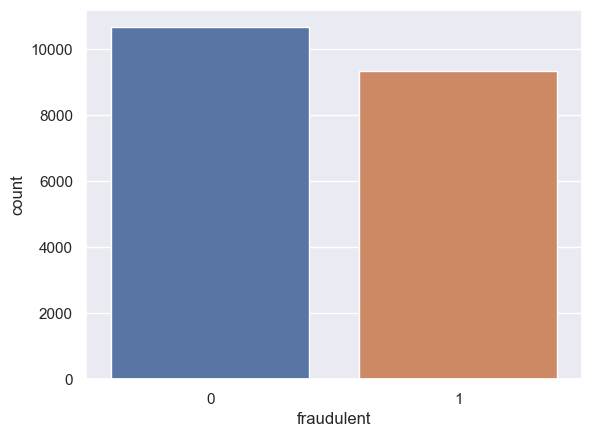

In [57]:
sns.set(style="darkgrid")
sns.countplot(x = "fraudulent" , data = sampled_data)

In [36]:
train_text , test_text ,train_category , test_category = train_test_split(sampled_data.text,sampled_data.fraudulent , test_size = 0.3 , random_state = 42)

In [82]:
train_text = pd.DataFrame(train_text)
train_text.reset_index(drop=True, inplace=True)
train_text.to_csv('train_text.csv', index=False)

train_target = pd.DataFrame(train_category)
train_target.reset_index(drop=True, inplace=True)
train_target.to_csv('train_target.csv', index=False)

test_target = pd.DataFrame(test_category)
test_target.reset_index(drop=True, inplace=True)
test_target.to_csv('test_target.csv', index=False)

test_text = pd.DataFrame(test_text)
test_text.reset_index(drop=True, inplace=True)
test_text.to_csv('test_text.csv', index=False)